# Python Computer Vision EP1: สอนตรวจจับวัตถุ(object detection)ด้วย YOLOV12
 Youtube: LouisMakerLab

In [9]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
import cv2
%matplotlib inline


# โหลดโมเดล YOLO
model = YOLO("yolo12n.pt")

# เส้นทางรูปภาพ
img_path = ["./datasets/coco8/images/8.jpeg", ] # เปลี่ยนเป็นเส้นทางของรูปภาพที่ต้องการทดสอบ
img_path = "./datasets/coco8/images/"  # เปลี่ยนเป็นเส้นทางของ folder ที่ต้องการทดสอบ

# Run inference with the YOLO12n model on the 'bus.jpg' image
results = model(source=img_path, save=False, device='cpu', conf=0.3) # ถ้ามี webcam ให้ใส่ source=0, ถ้ามีการ์ดจอ device=0
for r in results:
    annotated = r.plot() 
    cv2.imshow("Detection Result", annotated)
    cv2.waitKey(0)
    cv2.destroyAllWindows()



image 1/6 e:\Youtube\ComputerVision\YOLO\EP1\datasets\coco8\images\1.jpg: 448x640 1 giraffe, 72.0ms
image 2/6 e:\Youtube\ComputerVision\YOLO\EP1\datasets\coco8\images\2.jpg: 448x640 1 vase, 71.7ms
image 3/6 e:\Youtube\ComputerVision\YOLO\EP1\datasets\coco8\images\3.jpg: 448x640 1 zebra, 85.3ms
image 4/6 e:\Youtube\ComputerVision\YOLO\EP1\datasets\coco8\images\4.jpg: 640x512 2 persons, 3 horses, 1 potted plant, 77.4ms
image 5/6 e:\Youtube\ComputerVision\YOLO\EP1\datasets\coco8\images\5.jpg: 512x640 1 elephant, 76.3ms
image 6/6 e:\Youtube\ComputerVision\YOLO\EP1\datasets\coco8\images\8.jpeg: 480x640 1 person, 7 cars, 1 truck, 70.6ms
Speed: 1.3ms preprocess, 75.5ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


In [7]:
for r in results:
    print(r)
    for box in r.boxes:
        print(box)
        break
        rounded_bbox = [round(x) for x in box.xyxy[0].tolist()]
        print(f"Class: {r.names[int(box.cls[0])]}, Confidence: {box.conf[0]:.2f}, BBox: {rounded_bbox}")

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',


image 1/1 e:\Youtube\ComputerVision\YOLO\EP1\datasets\coco8\images\8.jpeg: 480x640 3 persons, 9 cars, 1 truck, 75.4ms
Speed: 2.0ms preprocess, 75.4ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 e:\Youtube\ComputerVision\YOLO\EP1\datasets\coco8\images\8.jpeg: 480x640 1 person, 3 cars, 75.5ms
Speed: 2.4ms preprocess, 75.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 e:\Youtube\ComputerVision\YOLO\EP1\datasets\coco8\images\8.jpeg: 480x640 1 person, 1 car, 71.2ms
Speed: 1.5ms preprocess, 71.2ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


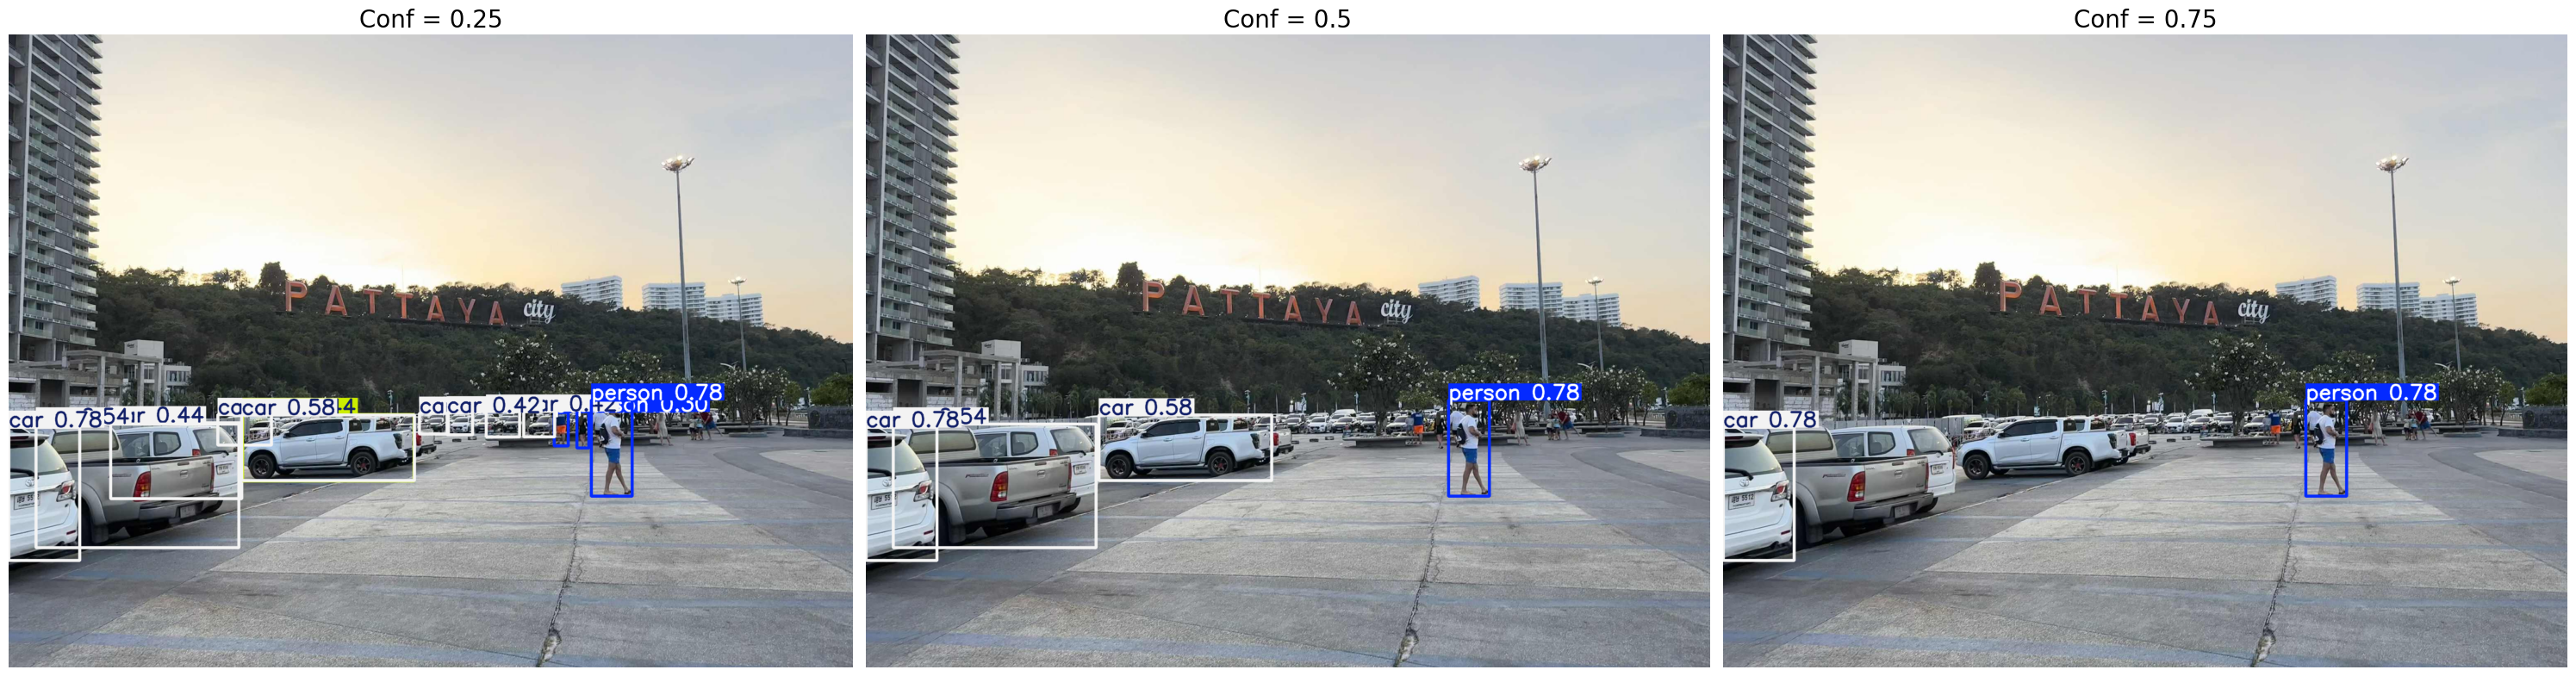

In [7]:
# ค่าความมั่นใจที่ต้องการทดสอบ
conf_levels = [0.25, 0.5, 0.75]
# สร้าง list เพื่อเก็บภาพผลลัพธ์แต่ละระดับ conf
annotated_images = []

# วนลูปรันโมเดลด้วยความมั่นใจต่าง ๆ
for conf in conf_levels:
    results = model(source="./datasets/coco8/images/8.jpeg", conf=conf, device='cpu')
    annotated = results[0].plot()  # ได้ภาพแบบ array ที่มี bounding box
    annotated_images.append((conf, annotated))

# แสดงผลลัพธ์ทั้งหมดใน subplot
plt.figure(figsize=(30, 10))
for i, (conf, img) in enumerate(annotated_images):
    plt.subplot(1, len(conf_levels), i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # แปลงสี BGR เป็น RGB
    plt.title(f"Conf = {conf}", fontsize=20)
    plt.axis("off")

plt.tight_layout()
plt.show()
